# K Means Clustering with Python

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create some Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=2.1,random_state=101)
data

(array([[-6.85686850e+00,  1.05192600e+01],
        [ 6.22920209e+00,  4.95496461e+00],
        [-4.93456363e-01,  3.57276738e+00],
        [ 1.91033384e+00,  1.00438499e+01],
        [ 5.32667672e+00,  7.29579217e+00],
        [-1.11202836e+01, -6.03711599e+00],
        [ 1.75547486e+00,  1.02814326e+01],
        [-2.05898109e+00,  1.41412134e+00],
        [ 7.46375706e-01,  8.50684199e+00],
        [-1.63182560e+00,  3.41897041e+00],
        [-6.57294989e+00,  9.97436621e+00],
        [-1.45298911e+00,  2.68587897e+00],
        [ 2.76920679e+00,  8.11827216e+00],
        [ 2.17366033e+00,  5.16570678e+00],
        [-5.51124744e+00,  9.93271742e+00],
        [-7.15945894e-01, -1.70194635e-01],
        [ 6.35133738e+00,  5.73735071e+00],
        [-2.75380689e+00,  3.75751485e-01],
        [-1.02518023e+01, -2.90826529e+00],
        [-4.65418474e+00,  1.19786434e+01],
        [-1.05797612e+01, -5.52644027e+00],
        [ 7.20934050e-01, -1.25623072e-01],
        [ 2.41237681e+00,  3.917

In [4]:
df = pd.DataFrame(data[0], columns=['Feature 1', 'Feature 2'])
df['Category'] = data[1]
df.head()

,Feature 1,Feature 2,Category
0,-6.856869,10.519260,3
1,6.229202,4.954965,2
2,-0.493456,3.572767,0
3,1.910334,10.043850,2
4,5.326677,7.295792,2


In [5]:
df['Category'].value_counts()

3    50
2    50
1    50
0    50
Name: Category, dtype: int64

In [6]:
for cat in df['Category'].unique() :
    print('Category ' + str(cat));
    print(round(df[df['Category'] == cat].std(),2))

Category 3
Feature 1    2.44
Feature 2    2.06
Category     0.00
dtype: float64
Category 2
Feature 1    2.29
Feature 2    2.18
Category     0.00
dtype: float64
Category 0
Feature 1    2.09
Feature 2    2.21
Category     0.00
dtype: float64
Category 1
Feature 1    1.86
Feature 2    2.43
Category     0.00
dtype: float64


In [7]:
# data[0]

## Visualize Data

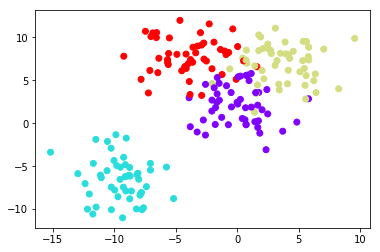

In [8]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

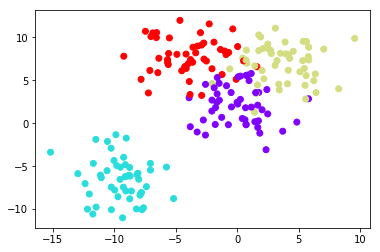

In [9]:
plt.scatter(df['Feature 1'],df['Feature 2'],c=df['Category'],cmap='rainbow')

## Creating the Clusters

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=4, random_state=5)

In [12]:
# kmeans.fit(data[0])
kmeans.fit(df[['Feature 1', 'Feature 2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [13]:
kmeans.cluster_centers_

array([[-0.18739804,  2.10099382],
       [-9.47590218, -6.55935688],
       [ 3.66801588,  7.09758432],
       [-4.27136322,  8.06572359]])

In [14]:
kmeans.labels_

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 0, 1, 3, 3, 3,
       0, 2, 3, 0, 1, 0, 0, 3, 2, 0, 1, 0, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 3, 0, 1, 2, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 3, 2, 3, 2, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 0, 2, 0, 1, 2, 1, 2, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 2, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 2, 2, 2,
       1, 0])

In [15]:
dfKMeans = pd.DataFrame(data[0], columns=['Feature 1', 'Feature 2'])
dfKMeans['Category'] = kmeans.labels_
dfKMeans.head()

,Feature 1,Feature 2,Category
0,-6.856869,10.519260,3
1,6.229202,4.954965,2
2,-0.493456,3.572767,0
3,1.910334,10.043850,2
4,5.326677,7.295792,2


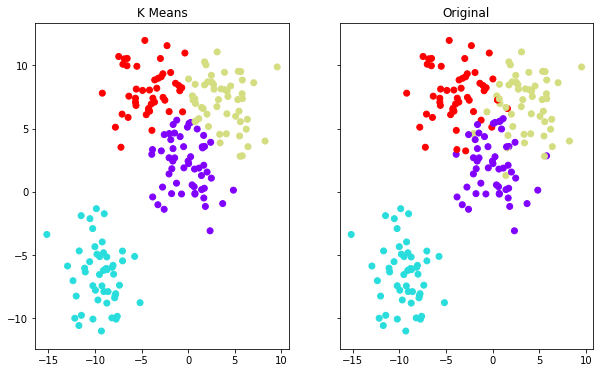

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
# ax1.set_title('K Means')
# ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
# ax2.set_title("Original")
# ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
ax1.set_title('K Means')
ax1.scatter(dfKMeans['Feature 1'],dfKMeans['Feature 2'],c=dfKMeans['Category'],cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(df['Feature 1'],df['Feature 2'],c=df['Category'],cmap='rainbow')

In [17]:
df[(df['Category'] != dfKMeans['Category'])]

,Feature 1,Feature 2,Category
39,1.421924,1.285627,2
45,1.601929,6.585902,3
49,-2.041036,4.609116,2
55,-1.229494,5.670732,3
71,0.828039,5.606322,0
73,-2.887478,3.238733,3
88,1.543428,3.475741,2
93,-0.082797,5.115269,3
104,-0.604843,6.327980,2
110,5.800504,2.848720,0


In [18]:
df['KMeans Category'] = dfKMeans['Category']
df.loc[df[(df['Category'] != dfKMeans['Category'])].index].head()

,Feature 1,Feature 2,Category,KMeans Category
39,1.421924,1.285627,2,0
45,1.601929,6.585902,3,2
49,-2.041036,4.609116,2,0
55,-1.229494,5.670732,3,0
71,0.828039,5.606322,0,2


In [19]:
dfKMeans[(df['Category'] != dfKMeans['Category'])]

,Feature 1,Feature 2,Category
39,1.421924,1.285627,0
45,1.601929,6.585902,2
49,-2.041036,4.609116,0
55,-1.229494,5.670732,0
71,0.828039,5.606322,2
73,-2.887478,3.238733,0
88,1.543428,3.475741,0
93,-0.082797,5.115269,0
104,-0.604843,6.327980,3
110,5.800504,2.848720,2


In [20]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Category'],dfKMeans['Category']))
print(classification_report(df['Category'],dfKMeans['Category']))

[[46  0  4  0]
 [ 0 50  0  0]
 [ 4  0 45  1]
 [ 4  0  3 43]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       1.00      1.00      1.00        50
           2       0.87      0.90      0.88        50
           3       0.98      0.86      0.91        50

   micro avg       0.92      0.92      0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



You should note, the colors are meaningless in reference between the two plots.

# Silhouette Analysis

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.6263760278808035
For n_clusters = 3 The average silhouette_score is : 0.46237692754463394
For n_clusters = 4 The average silhouette_score is : 0.4995551876179987
For n_clusters = 5 The average silhouette_score is : 0.45544298623662754
For n_clusters = 6 The average silhouette_score is : 0.36953347988984686


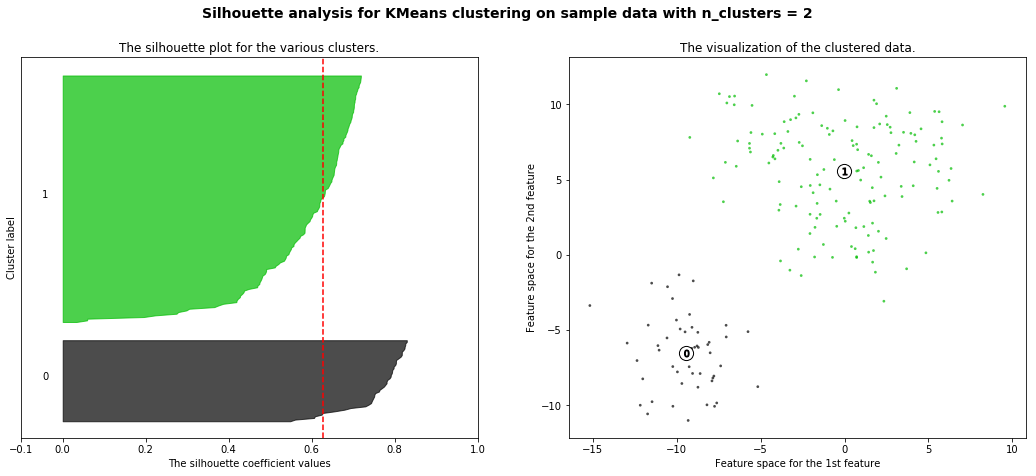

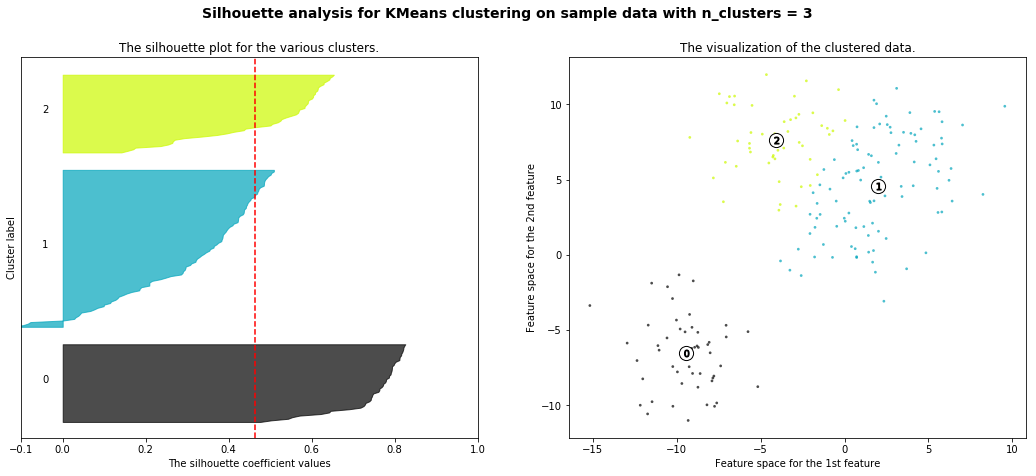

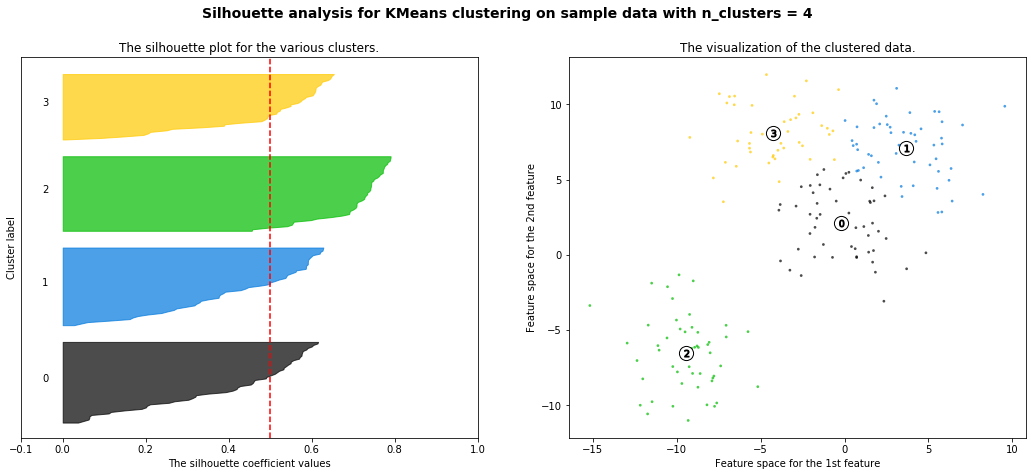

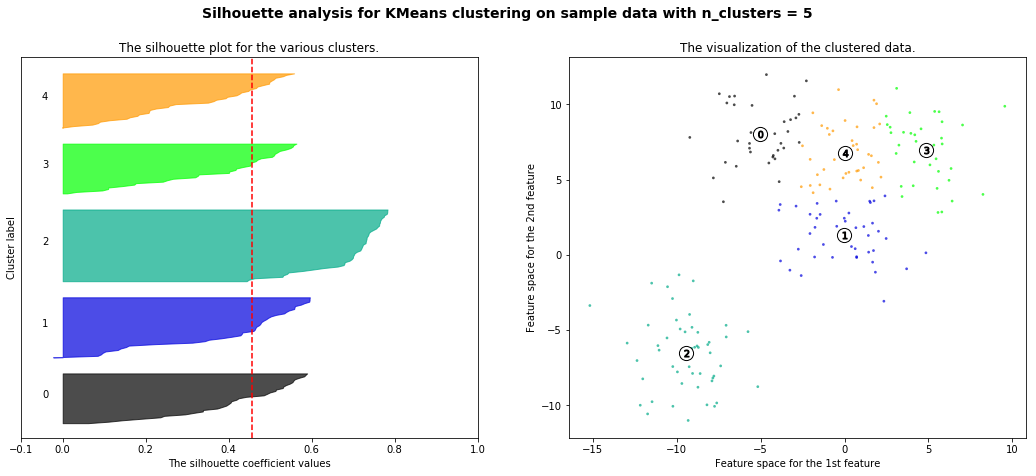

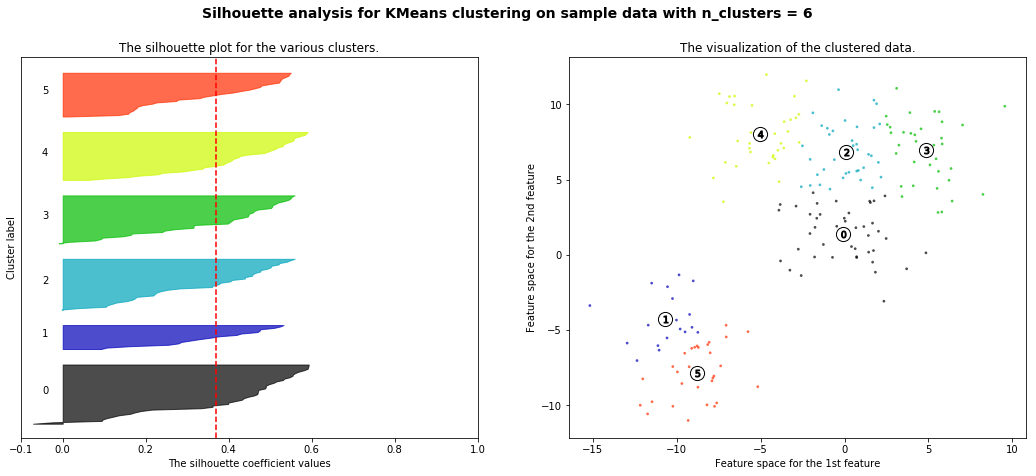

In [22]:
range_n_clusters = [2, 3, 4, 5, 6]
X = data[0]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [23]:
inertia_list = []

# Will take some time
for i in range(1,11):
    
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data[0])
    inertia_list.append(kmeans.inertia_)

Text(0,0.5,'Inertia')

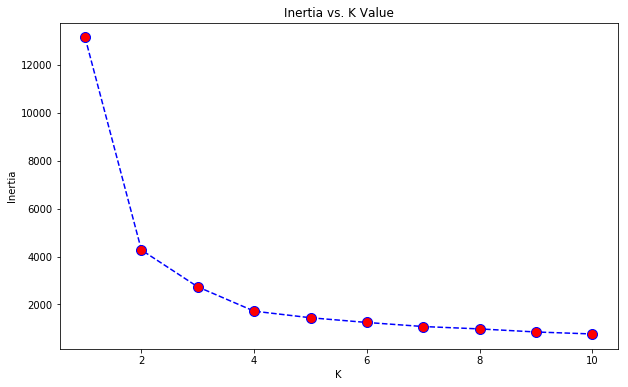

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),inertia_list,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Inertia vs. K Value')
plt.xlabel('K')
plt.ylabel('Inertia')

# Great Job!